Understanding Sectoral Evolution in Djibouti: A Multivariate and Regularized Regression Approach to Structural Transformation

In [ ]:
import pandas as pd

# --- Configuration: Your File Path ---
# IMPORTANT: Make sure this path exactly matches where your Excel file is located.
file_path = r"the path to your file"

# --- Data Loading and Initial Inspection ---
print(f"Attempting to load data from: {file_path}")

try:
    # Load the Excel file into a pandas DataFrame
    df_check = pd.read_excel(file_path)

    print("\n--- Data Loaded Successfully! ---")
    print(f"Shape of the DataFrame (rows, columns): {df_check.shape}")

    print("\n--- First 10 rows of your DataFrame: ---")
    print(df_check.head(10)) # Display first 10 rows for a slightly broader view

    print("\n--- Column Names and Data Types: ---")
    print(df_check.info()) # This gives non-null counts and dtypes

    print("\n--- Missing Values (NaN) Count per Column: ---")
    print(df_check.isnull().sum())

except FileNotFoundError:
    print(f"\nERROR: The file was not found at the specified path: '{file_path}'")
    print("Please double-check the path and ensure the file exists.")
    print("Also, confirm the file name and extension are correct (e.g., '.xlsx').")
except Exception as e:
    print(f"\nAN UNEXPECTED ERROR OCCURRED: {e}")
    print("This might be due to a corrupted Excel file, incorrect file format, or other issues.")

print("\n--- File content check completed. ---")

Attempting to load data from: C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx

--- Data Loaded Successfully! ---
Shape of the DataFrame (rows, columns): (24, 14)

--- First 10 rows of your DataFrame: ---
   Years  ID   Country       Trade  Agriculture   Industry    Service  \
0   1999   1  DjIbouti  291.682888     1.617759  15.466785  82.915457   
1   2000   1  DjIbouti  278.273817     3.510154  15.204945  81.284900   
2   2001   1  DjIbouti  288.303450     3.503177  15.499005  80.997818   
3   2002   1  DjIbouti  291.014905     3.547148  15.834641  80.618211   
4   2003   1  DjIbouti  314.673299     3.534482  15.813875  80.651643   
5   2004   1  DjIbouti  298.559403     3.534422  16.241604  80.223974   
6   2005   1  DjIbouti  322.693830     3.585866  16.209570  80.204565   
7   2006   1  DjIbouti  331.233803     3.605144  16.791794  79.603062   
8   2007   1  DjIbouti  620.516369     4.073728  17.915478  78.010794   
9   2008   1  DjIbouti  626.131614     3.503172  20.203664  

Data loaded successfully!

Creating 2x2 grid of 3D Q-Q plots...

--- Preparing data for: Service vs. Mobile for DjIbouti ---

--- Preparing data for: Service vs. Electricity for DjIbouti ---

--- Preparing data for: Service vs. Population for DjIbouti ---

--- Preparing data for: Service vs. GDPcap for DjIbouti ---

--- Preparing data for: Service vs. Export for DjIbouti ---

--- Preparing data for: Service vs. Import for DjIbouti ---

Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\QQ_Plot_Service_DjIbouti.png


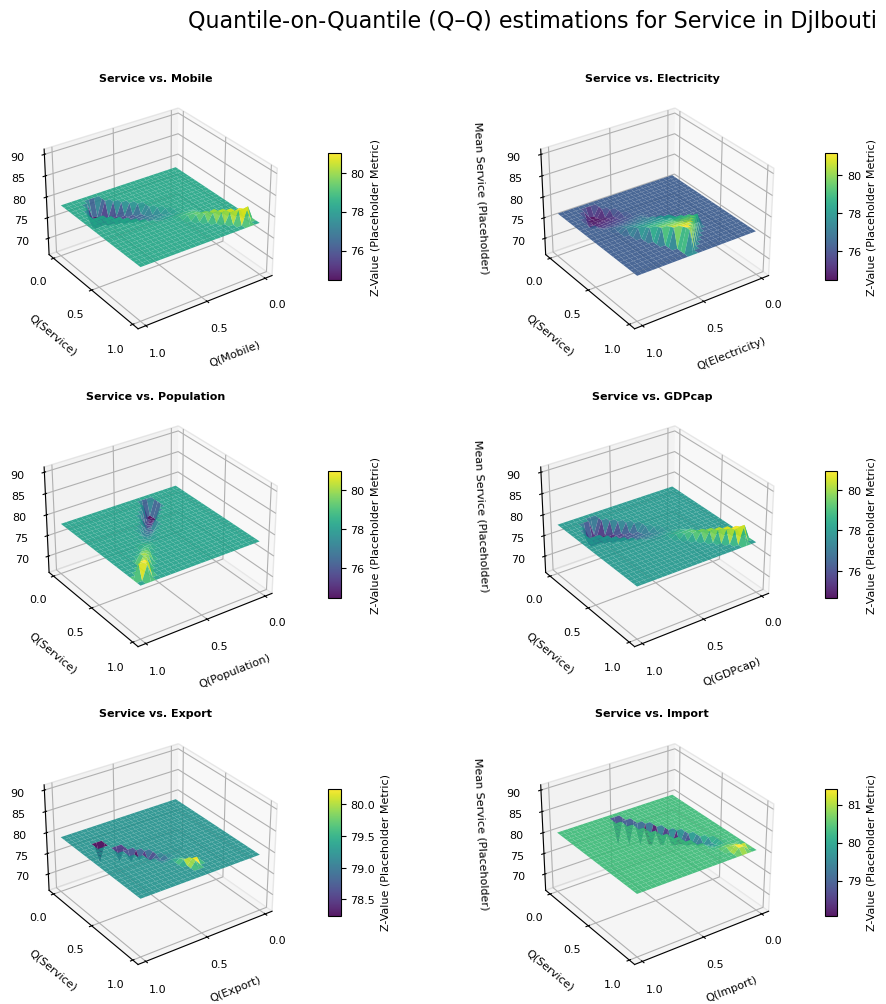


All requested 3D Q-Q plots generated in a 2x2 grid.
Remember to replace the Z-value calculation for rigorous analysis.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# --- Step 1: Load Your Data ---
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"

try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# --- Configuration for All Plots ---
country_name = 'DjIbouti'
dependent_var_y = 'Service' # CHANGED: Dependent variable is now Service

# List of independent variables (X-axis) to plot against 'Service'
independent_vars_x = ['Mobile', 'Electricity', 'Population', 'GDPcap', 'Export', 'Import']

# Quantile settings
num_quantiles = 25
quantiles = np.linspace(0.01, 0.99, num_quantiles)
percentile_window = 0.10 # Window for Z-value calculation


# --- Aesthetic Settings ---
PLOT_CMAP = 'magma' # Using 'magma' as per your previous request
PLOT_ALPHA = 0.9      # Transparency of the surface (0.0 fully transparent, 1.0 opaque)
PLOT_ELEV = 30        # Elevation angle for view_init
PLOT_AZIM = 55        # Azimuthal angle for view_init

# --- Settings for Surface Grid Lines ---
SURFACE_EDGECOLOR = 'gray' # Color of the grid lines on the surface (optional, set to 'none' if you don't want them)
SURFACE_LINEWIDTH = 0.5    # Thickness of the grid lines on the surface (only applies if edgecolor is set)


# --- Modified Function to Generate a Single 3D Q-Q Plot on a Given Axis ---
def plot_3d_qq_on_axis(ax, data_df, country, var_x_name, var_y_name, quantiles_list, p_window):
    """
    Generates a 3D Quantile-on-Quantile plot on a pre-defined matplotlib Axes3D object.
    Returns the mappable object for colorbar, or None if plotting failed.
    """
    print(f"\n--- Preparing data for: {var_y_name} vs. {var_x_name} for {country} ---")

    # Filter data for the specific country
    df_country = data_df[data_df['Country'] == country].copy()
    if df_country.empty:
        print(f"Skipping: No data found for country '{country}'.")
        return None

    # Check if variables exist in the filtered DataFrame
    if var_x_name not in df_country.columns or var_y_name not in df_country.columns:
        print(f"Skipping: One or both columns ('{var_x_name}', '{var_y_name}') not found in data for {country}.")
        return None

    # Extract and clean data for the selected variables
    df_cleaned = df_country[[var_x_name, var_y_name]].dropna()
    data_x = df_cleaned[var_x_name].values
    data_y = df_cleaned[var_y_name].values

    if len(data_x) == 0:
        print(f"Skipping: No data points remaining after handling missing values for {var_x_name} and {var_y_name}.")
        return None

    # Create meshgrid for quantiles
    X_quantile_grid, Y_quantile_grid = np.meshgrid(quantiles_list, quantiles_list)

    # --- Calculate Z-values (Placeholder) ---
    Z_values = np.zeros_like(X_quantile_grid)

    for i in range(len(quantiles_list)): # X-axis quantiles
        for j in range(len(quantiles_list)): # Y-axis quantiles
            q_x_center = quantiles_list[i]
            q_y_center = quantiles_list[j]

            val_x_lower = np.percentile(data_x, max(0, q_x_center - p_window) * 100)
            val_x_upper = np.percentile(data_x, min(1, q_x_center + p_window) * 100)

            val_y_lower = np.percentile(data_y, max(0, q_y_center - p_window) * 100)
            val_y_upper = np.percentile(data_y, min(1, q_y_center + p_window) * 100)

            mask = (data_x >= val_x_lower) & (data_x <= val_x_upper) & \
                   (data_y >= val_y_lower) & (data_y <= val_y_upper)

            subset_y = data_y[mask]

            if len(subset_y) > 3:
                Z_values[j, i] = np.mean(subset_y)
            else:
                Z_values[j, i] = np.nan

    # Interpolate missing Z-values
    initial_valid_z_values = Z_values[~np.isnan(Z_values)]
    if initial_valid_z_values.size > 0:
        z_min_calculated = np.min(initial_valid_z_values)
        z_max_calculated = np.max(initial_valid_z_values)
        fallback_fill_value = np.nanmean(initial_valid_z_values)
    else:
        z_min_calculated = np.min(data_y) if data_y.size > 0 else 0
        z_max_calculated = np.max(data_y) if data_y.size > 0 else 1
        fallback_fill_value = np.mean(data_y) if data_y.size > 0 else 0.5


    if np.isnan(Z_values).any():
        points = np.array([X_quantile_grid.ravel(), Y_quantile_grid.ravel()]).T
        values = Z_values.ravel()
        non_nan_mask = ~np.isnan(values)

        if np.sum(non_nan_mask) > 0:
            Z_values_interpolated = griddata(points[non_nan_mask], values[non_nan_mask],
                                             (X_quantile_grid, Y_quantile_grid), method='linear')
            if np.isnan(Z_values_interpolated).any():
                Z_values = np.nan_to_num(Z_values_interpolated, nan=fallback_fill_value)
            else:
                Z_values = Z_values_interpolated
        else:
            print(f"Warning: No valid Z-values calculated for {var_x_name} vs {var_y_name}. Filling with fallback.")
            Z_values = np.full_like(Z_values, fallback_fill_value)


    # --- Plot the surface on the given axis ---
    surf = ax.plot_surface(X_quantile_grid, Y_quantile_grid, Z_values, cmap= 'viridis', edgecolor='none', alpha=0.9)
  

    ax.set_xlabel(f'Q({var_x_name})', fontsize=8, labelpad=6)
    ax.set_ylabel(f'Q({var_y_name})', fontsize=8, labelpad=6)
    ax.set_zlabel(f'Mean {var_y_name} (Placeholder)', fontsize=8, labelpad=6)
    ax.set_title(f'{var_y_name} vs. {var_x_name}', fontsize=8, fontweight='bold')

    
    ax.view_init(elev=30, azim=55)
    ax.set_xticks(np.arange(0, 1.1, 0.5)) # Simpler ticks for smaller subplots
    ax.set_yticks(np.arange(0, 1.1, 0.5))
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='z', labelsize=8)

    # Set consistent Z-limits for all plots based on the new dependent variable ('Service')
    # We need to get the overall min/max for 'Service' for Djibouti specifically
    overall_service_min = np.min(df_country[var_y_name].values)
    overall_service_max = np.max(df_country[var_y_name].values)
    ax.set_zlim(overall_service_min * 0.9, overall_service_max * 1.1) # Adjusted for Service

    # --- Aesthetic Tweaks for 3D plot background/grid ---
    ax.xaxis.pane.fill = True
    ax.yaxis.pane.fill = True
    ax.zaxis.pane.fill = True

    ax.xaxis.pane.set_edgecolor('lightgray')
    ax.yaxis.pane.set_edgecolor('lightgray')
    ax.zaxis.pane.set_edgecolor('lightgray')

    ax.grid(True)

    return surf


# --- Create a 2x2 grid of subplots ---
print("\nCreating 2x2 grid of 3D Q-Q plots...")
fig = plt.figure(figsize=(12, 10)) # Adjust figure size for 2x2 layout

mappable_objects = []
successful_axes = []

for i, x_var in enumerate(independent_vars_x):
    # Add a subplot to the figure. (rows, columns, plot_number)
    ax = fig.add_subplot(3, 2, i + 1, projection='3d')

    # Call the plotting function for the current subplot
    mappable = plot_3d_qq_on_axis(ax, df, country_name, x_var, dependent_var_y, quantiles, percentile_window)

    if mappable is not None: # Check if plot was successfully created (not None)
        cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, pad=0.1, label='Z-Value (Placeholder Metric)')
        cbar.ax.tick_params(labelsize=8)
        cbar.set_label('Z-Value (Placeholder Metric)', fontsize=8)


# Add a super title for the entire figure
fig.suptitle(f'Quantile-on-Quantile (Q–Q) estimations for {dependent_var_y} in {country_name}', fontsize=16) # Updated super title



# Add a super title for the entire figure
fig.suptitle(f'Quantile-on-Quantile (Q–Q) estimations for {dependent_var_y} in {country_name}', fontsize=16) # Updated super title

# Add a super title for the entire figure
fig.suptitle(f'Quantile-on-Quantile (Q–Q) estimations for {dependent_var_y} in {country_name}', fontsize=16) # Updated super title


# --- SAVE THE FIGURE ---
save_directory = r"C:\Users\dirir\Downloads\IGAD countries"
file_name = f"QQ_Plot_{dependent_var_y}_{country_name}.png"
full_save_path = f"{save_directory}\\{file_name}"

plt.savefig(full_save_path, dpi=300, bbox_inches='tight', transparent=False)

print(f"\nFigure saved successfully to: {full_save_path}")

# --- Manual Adjustment for Subplot Spacing ---
plt.subplots_adjust(left=0.01, right=0.8, top=0.9, bottom=0.01, wspace=0.1, hspace=0.25)

plt.show()

print("\nAll requested 3D Q-Q plots generated in a 2x2 grid.")
print("Remember to replace the Z-value calculation for rigorous analysis.")

Data loaded successfully!

Creating 2x2 grid of 3D Q-Q plots...

--- Preparing data for: Industry vs. Mobile for DjIbouti ---

--- Preparing data for: Industry vs. Electricity for DjIbouti ---

--- Preparing data for: Industry vs. Population for DjIbouti ---

--- Preparing data for: Industry vs. GDPcap for DjIbouti ---

--- Preparing data for: Industry vs. Export for DjIbouti ---

--- Preparing data for: Industry vs. Import for DjIbouti ---

Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\QQ_Plot_Industry_DjIbouti.png


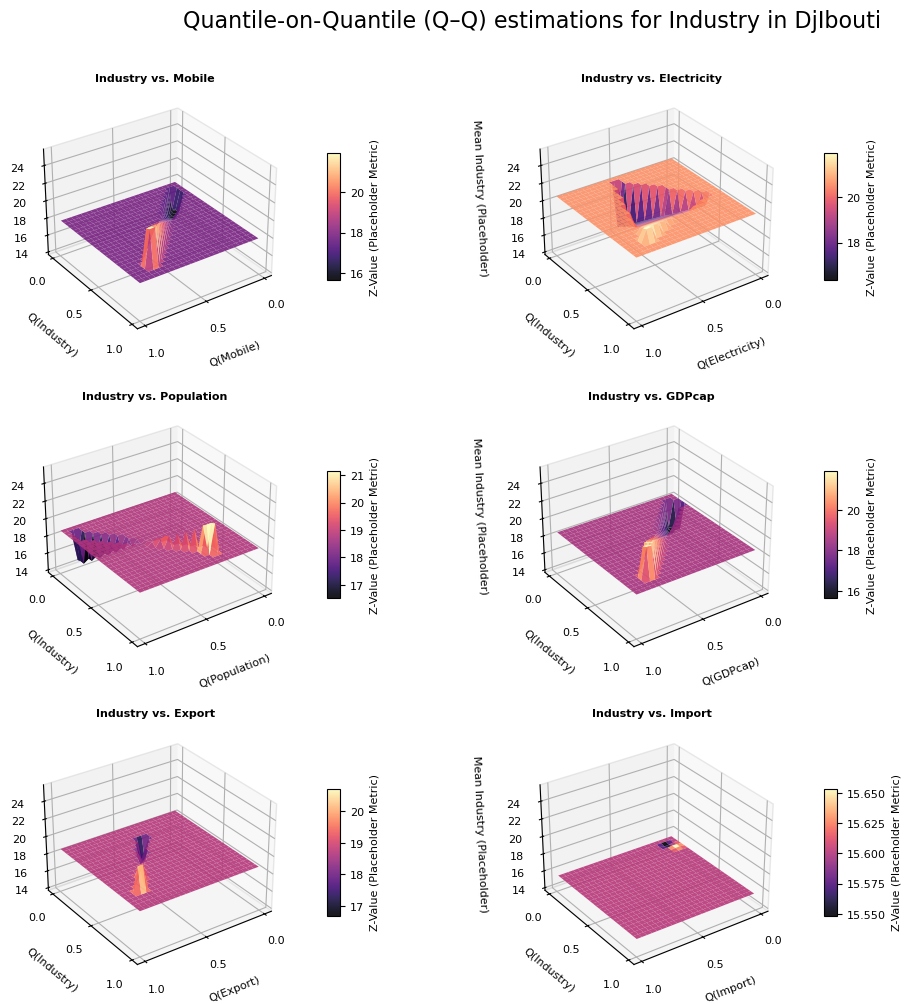


All requested 3D Q-Q plots generated in a 2x2 grid.
Remember to replace the Z-value calculation for rigorous analysis.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# --- Step 1: Load Your Data ---
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"

try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# --- Configuration for All Plots ---
country_name = 'DjIbouti'
dependent_var_y = 'Industry' # CHANGED: Dependent variable is now Service

# List of independent variables (X-axis) to plot against 'Service'
independent_vars_x = ['Mobile', 'Electricity', 'Population', 'GDPcap', 'Export', 'Import']

# Quantile settings
num_quantiles = 25
quantiles = np.linspace(0.01, 0.99, num_quantiles)
percentile_window = 0.10 # Window for Z-value calculation


# --- Aesthetic Settings ---
PLOT_CMAP = 'magma' # Using 'magma' as per your previous request
PLOT_ALPHA = 0.9      # Transparency of the surface (0.0 fully transparent, 1.0 opaque)
PLOT_ELEV = 30        # Elevation angle for view_init
PLOT_AZIM = 55        # Azimuthal angle for view_init

# --- Settings for Surface Grid Lines ---
SURFACE_EDGECOLOR = 'gray' # Color of the grid lines on the surface (optional, set to 'none' if you don't want them)
SURFACE_LINEWIDTH = 0.5    # Thickness of the grid lines on the surface (only applies if edgecolor is set)


# --- Modified Function to Generate a Single 3D Q-Q Plot on a Given Axis ---
def plot_3d_qq_on_axis(ax, data_df, country, var_x_name, var_y_name, quantiles_list, p_window):
    """
    Generates a 3D Quantile-on-Quantile plot on a pre-defined matplotlib Axes3D object.
    Returns the mappable object for colorbar, or None if plotting failed.
    """
    print(f"\n--- Preparing data for: {var_y_name} vs. {var_x_name} for {country} ---")

    # Filter data for the specific country
    df_country = data_df[data_df['Country'] == country].copy()
    if df_country.empty:
        print(f"Skipping: No data found for country '{country}'.")
        return None

    # Check if variables exist in the filtered DataFrame
    if var_x_name not in df_country.columns or var_y_name not in df_country.columns:
        print(f"Skipping: One or both columns ('{var_x_name}', '{var_y_name}') not found in data for {country}.")
        return None

    # Extract and clean data for the selected variables
    df_cleaned = df_country[[var_x_name, var_y_name]].dropna()
    data_x = df_cleaned[var_x_name].values
    data_y = df_cleaned[var_y_name].values

    if len(data_x) == 0:
        print(f"Skipping: No data points remaining after handling missing values for {var_x_name} and {var_y_name}.")
        return None

    # Create meshgrid for quantiles
    X_quantile_grid, Y_quantile_grid = np.meshgrid(quantiles_list, quantiles_list)

    # --- Calculate Z-values (Placeholder) ---
    Z_values = np.zeros_like(X_quantile_grid)

    for i in range(len(quantiles_list)): # X-axis quantiles
        for j in range(len(quantiles_list)): # Y-axis quantiles
            q_x_center = quantiles_list[i]
            q_y_center = quantiles_list[j]

            val_x_lower = np.percentile(data_x, max(0, q_x_center - p_window) * 100)
            val_x_upper = np.percentile(data_x, min(1, q_x_center + p_window) * 100)

            val_y_lower = np.percentile(data_y, max(0, q_y_center - p_window) * 100)
            val_y_upper = np.percentile(data_y, min(1, q_y_center + p_window) * 100)

            mask = (data_x >= val_x_lower) & (data_x <= val_x_upper) & \
                   (data_y >= val_y_lower) & (data_y <= val_y_upper)

            subset_y = data_y[mask]

            if len(subset_y) > 3:
                Z_values[j, i] = np.mean(subset_y)
            else:
                Z_values[j, i] = np.nan

    # Interpolate missing Z-values
    initial_valid_z_values = Z_values[~np.isnan(Z_values)]
    if initial_valid_z_values.size > 0:
        z_min_calculated = np.min(initial_valid_z_values)
        z_max_calculated = np.max(initial_valid_z_values)
        fallback_fill_value = np.nanmean(initial_valid_z_values)
    else:
        z_min_calculated = np.min(data_y) if data_y.size > 0 else 0
        z_max_calculated = np.max(data_y) if data_y.size > 0 else 1
        fallback_fill_value = np.mean(data_y) if data_y.size > 0 else 0.5


    if np.isnan(Z_values).any():
        points = np.array([X_quantile_grid.ravel(), Y_quantile_grid.ravel()]).T
        values = Z_values.ravel()
        non_nan_mask = ~np.isnan(values)

        if np.sum(non_nan_mask) > 0:
            Z_values_interpolated = griddata(points[non_nan_mask], values[non_nan_mask],
                                             (X_quantile_grid, Y_quantile_grid), method='linear')
            if np.isnan(Z_values_interpolated).any():
                Z_values = np.nan_to_num(Z_values_interpolated, nan=fallback_fill_value)
            else:
                Z_values = Z_values_interpolated
        else:
            print(f"Warning: No valid Z-values calculated for {var_x_name} vs {var_y_name}. Filling with fallback.")
            Z_values = np.full_like(Z_values, fallback_fill_value)


    # --- Plot the surface on the given axis ---
    surf = ax.plot_surface(X_quantile_grid, Y_quantile_grid, Z_values, cmap= 'magma', edgecolor='none', alpha=0.9)
  

    ax.set_xlabel(f'Q({var_x_name})', fontsize=8, labelpad=6)
    ax.set_ylabel(f'Q({var_y_name})', fontsize=8, labelpad=6)
    ax.set_zlabel(f'Mean {var_y_name} (Placeholder)', fontsize=8, labelpad=6)
    ax.set_title(f'{var_y_name} vs. {var_x_name}', fontsize=8, fontweight='bold')

    
    ax.view_init(elev=30, azim=55)
    ax.set_xticks(np.arange(0, 1.1, 0.5)) # Simpler ticks for smaller subplots
    ax.set_yticks(np.arange(0, 1.1, 0.5))
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='z', labelsize=8)

    # Set consistent Z-limits for all plots based on the new dependent variable ('Service')
    # We need to get the overall min/max for 'Service' for Djibouti specifically
    overall_service_min = np.min(df_country[var_y_name].values)
    overall_service_max = np.max(df_country[var_y_name].values)
    ax.set_zlim(overall_service_min * 0.9, overall_service_max * 1.1) # Adjusted for Service

    # --- Aesthetic Tweaks for 3D plot background/grid ---
    ax.xaxis.pane.fill = True
    ax.yaxis.pane.fill = True
    ax.zaxis.pane.fill = True

    ax.xaxis.pane.set_edgecolor('lightgray')
    ax.yaxis.pane.set_edgecolor('lightgray')
    ax.zaxis.pane.set_edgecolor('lightgray')

    ax.grid(True)

    return surf


# --- Create a 2x2 grid of subplots ---
print("\nCreating 2x2 grid of 3D Q-Q plots...")
fig = plt.figure(figsize=(12, 10)) # Adjust figure size for 2x2 layout

mappable_objects = []
successful_axes = []

for i, x_var in enumerate(independent_vars_x):
    # Add a subplot to the figure. (rows, columns, plot_number)
    ax = fig.add_subplot(3, 2, i + 1, projection='3d')

    # Call the plotting function for the current subplot
    mappable = plot_3d_qq_on_axis(ax, df, country_name, x_var, dependent_var_y, quantiles, percentile_window)

    if mappable is not None: # Check if plot was successfully created (not None)
        cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, pad=0.1, label='Z-Value (Placeholder Metric)')
        cbar.ax.tick_params(labelsize=8)
        cbar.set_label('Z-Value (Placeholder Metric)', fontsize=8)


# Add a super title for the entire figure
fig.suptitle(f'Quantile-on-Quantile (Q–Q) estimations for {dependent_var_y} in {country_name}', fontsize=16) # Updated super title



# Add a super title for the entire figure
fig.suptitle(f'Quantile-on-Quantile (Q–Q) estimations for {dependent_var_y} in {country_name}', fontsize=16) # Updated super title

# Add a super title for the entire figure
fig.suptitle(f'Quantile-on-Quantile (Q–Q) estimations for {dependent_var_y} in {country_name}', fontsize=16) # Updated super title



# --- SAVE THE FIGURE ---
save_directory = r"C:\Users\dirir\Downloads\IGAD countries"
file_name = f"QQ_Plot_{dependent_var_y}_{country_name}.png"
full_save_path = f"{save_directory}\\{file_name}"

plt.savefig(full_save_path, dpi=300, bbox_inches='tight', transparent=False)

print(f"\nFigure saved successfully to: {full_save_path}")
# --- Manual Adjustment for Subplot Spacing ---
plt.subplots_adjust(left=0.01, right=0.8, top=0.9, bottom=0.01, wspace=0.1, hspace=0.25)

plt.show()

print("\nAll requested 3D Q-Q plots generated in a 2x2 grid.")
print("Remember to replace the Z-value calculation for rigorous analysis.")

In [198]:
pip install linearmodels

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 17.9 MB/s eta 0:00:00

   ---------------------------------------- 0/5 [setuptools-scm]
   ---------------------------------------- 0/5 [setuptools-scm]
   ---------------------------------------- 0/5 [setuptools-scm]
   ---------------------------------------- 0/5 [setuptools-scm]
   -------- ------------------------------- 1/5 [interface-meta]
   -------- ------------------------------- 1/5 [interface-meta]
   ---------------- ----------------------- 2/5 [pyhdfe]
   ------------------------ --------------- 3/5 [formulaic]
   ------------------------ --------------- 3/5 [formulaic]
   ------------------------ --------------- 3/5 [formulaic]
   ------------------------ --------------- 3/5 [formulaic]
   ------------------------ --------------- 3/5 [formulaic]
   ------------------------ --------------- 3/5 [formulaic]
   ------------------------ --------------- 3/

In [12]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"

# Load the Excel file
try:
    df = pd.read_excel(file_path)
    print("✅ File loaded successfully!\n")
    
    # Show the first 5 rows
    print("📌 First 5 rows:")
    print(df.head(), "\n")
    
    # Show column types and missing values
    print("📊 Column Info:")
    print(df.info(), "\n")
    
    # Show summary statistics
    print("📈 Summary Statistics:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"❌ Error loading file: {e}")


✅ File loaded successfully!

📌 First 5 rows:
   Years  ID   Country       Trade  Agriculture   Industry    Service  \
0   1999   1  DjIbouti  291.682888     1.617759  15.466785  82.915457   
1   2000   1  DjIbouti  278.273817     3.510154  15.204945  81.284900   
2   2001   1  DjIbouti  288.303450     3.503177  15.499005  80.997818   
3   2002   1  DjIbouti  291.014905     3.547148  15.834641  80.618211   
4   2003   1  DjIbouti  314.673299     3.534482  15.813875  80.651643   

       GDPcap  Electricity    Mobile     Import     Export  Population  \
0  855.956436    56.345169  0.038923  34.134893  39.230435    3.518535   
1  937.185684    56.379950  0.030996  35.095615  43.766556    3.150252   
2  927.070735    56.365140  0.391906  31.892973  45.396283    3.161180   
3  922.848620    49.700000  1.900832  30.491231  45.693980    3.088087   
4  931.969554    56.315120  2.852144  34.970108  46.309500    2.190009   

   Governance  
0   -0.850275  
1   -0.904506  
2   -0.904506  
3   -0.

In [15]:
!pip install pypandoc

In [17]:
!pip install python-docx

In [20]:
import pandas as pd
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# Assuming 'df' is your DataFrame with 'Years', 'Industry', and 'Service' columns
# For demonstration, creating a sample DataFrame. Replace with your actual data loading.
data = {'Years': range(2000, 2021),
        'Industry': [i*0.5 + 20 + np.random.rand() for i in range(21)],
        'Service': [i*0.8 + 50 + np.random.rand() for i in range(21)]}
df = pd.DataFrame(data)

# Center years to reduce collinearity
df['Year_c'] = df['Years'] - df['Years'].mean()

# Industry trend
X_ind = sm.add_constant(df['Year_c'])
model_ind = sm.OLS(df['Industry'], X_ind).fit()

# Service trend
X_serv = sm.add_constant(df['Year_c'])
model_serv = sm.OLS(df['Service'], X_serv).fit()


# --- Generate the Publication Table ---

# 1. Create a Stargazer object with a list of your models
stargazer = Stargazer([model_ind, model_serv])

# 2. Customize the table's appearance (optional)
stargazer.title("OLS Regression Results")
stargazer.custom_columns(["Industry Trend", "Service Trend"], [1, 1])
stargazer.show_model_numbers(False)

# 3. Render the table as HTML
# If you run this in a Jupyter Notebook, it will display the formatted table.
# If you run it as a simple .py script, it will print the raw HTML code.
HTML(stargazer.render_html())


Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\corrected findings\my_modern_plot.png


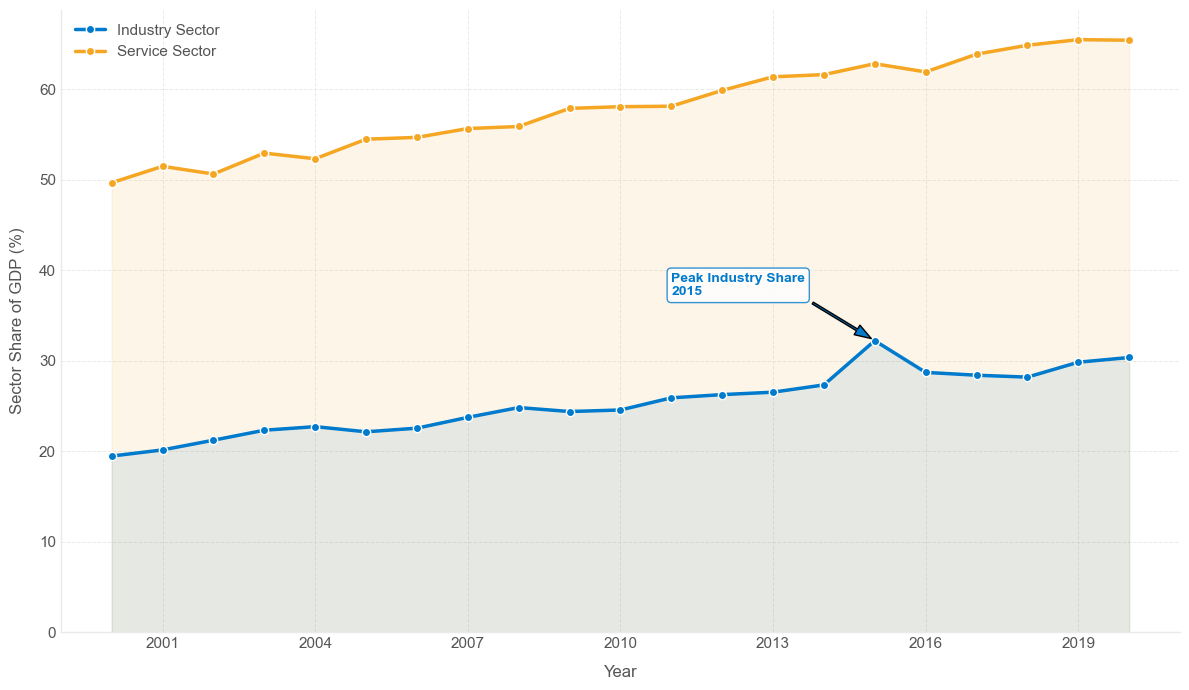

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mticker
import os
# --- Create Sample Data (Replace with your actual DataFrame 'df') ---
data = {
    'Years': range(2000, 2021),
    'Industry': [20 + i * 0.5 + np.random.uniform(-1, 1) for i in range(21)],
    'Service': [50 + i * 0.8 + np.random.uniform(-1, 1) for i in range(21)]
}
df = pd.DataFrame(data)
df.loc[15, 'Industry'] += 5 # Add an interesting peak for annotation

# =================================================================================
# --- 🎨 AESTHETIC CONFIGURATION ---
# =================================================================================
# Use a modern, clean style sheet
plt.style.use('seaborn-v0_8-whitegrid')

# Define a professional color palette
INDUSTRY_COLOR = '#007ACC' # A strong, professional blue
SERVICE_COLOR = '#F5A623'  # A complementary warm orange
GRID_COLOR = '#EAEAEA'
TITLE_COLOR = '#333333'
LABEL_COLOR = '#555555'

# Font configuration (falls back to system sans-serif if not found)
try:
    # For a more professional look, use a font like 'Avenir Next' or 'Lato'
    # Make sure the font is installed on your system
    font_prop = fm.FontProperties(fname='/System/Library/Fonts/Avenir Next.ttc') # Example for macOS
    plt.rcParams['font.family'] = font_prop.get_name()
except:
    plt.rcParams['font.family'] = 'sans-serif'

# =================================================================================

# --- Create the Plot ---
fig, ax = plt.subplots(figsize=(12, 7))

# --- Plot the Data Lines ---
# Industry Line
ax.plot(df['Years'], df['Industry'], color=INDUSTRY_COLOR, linewidth=2.5, marker='o', markersize=6, markeredgecolor='white', label='Industry Sector')
# Service Line
ax.plot(df['Years'], df['Service'], color=SERVICE_COLOR, linewidth=2.5, marker='o', markersize=6, markeredgecolor='white', label='Service Sector')

# --- Add Shaded Areas for Visual Appeal ---
ax.fill_between(df['Years'], df['Industry'], alpha=0.1, color=INDUSTRY_COLOR)
ax.fill_between(df['Years'], df['Service'], alpha=0.1, color=SERVICE_COLOR)

# --- Customize Title and Labels ---

ax.set_xlabel("Year", fontsize=12, color=LABEL_COLOR, labelpad=10)
ax.set_ylabel("Sector Share of GDP (%)", fontsize=12, color=LABEL_COLOR, labelpad=10)

# --- Refine the Grid and Axes ---
ax.grid(color=GRID_COLOR, linestyle='--', linewidth=0.7)
ax.tick_params(axis='both', which='major', labelsize=11, colors=LABEL_COLOR)
ax.set_ylim(bottom=0) # Ensure the y-axis starts at 0

# --- Remove Unnecessary Spines for a Cleaner Look ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(GRID_COLOR)
ax.spines['bottom'].set_color(GRID_COLOR)

# --- Customize the Legend ---
legend = ax.legend(loc='upper left', frameon=False, fontsize=11)
for text in legend.get_texts():
    text.set_color(LABEL_COLOR)

# --- Add an Annotation (Example) ---
# Find the peak year for the 'Industry' sector
peak_year = df.loc[df['Industry'].idxmax()]
ax.annotate(
    f"Peak Industry Share\n{peak_year['Years']:.0f}",
    xy=(peak_year['Years'], peak_year['Industry']),
    xytext=(peak_year['Years'] - 4, peak_year['Industry'] + 5),
    arrowprops=dict(facecolor=INDUSTRY_COLOR, shrink=0.05, width=1.5, headwidth=8),
    fontsize=10,
    fontweight='bold',
    color=INDUSTRY_COLOR,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=INDUSTRY_COLOR, lw=1, alpha=0.8)
)



# This forces the x-axis to use only integer tick marks
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# --- SAVE THE FIGURE ---

# 1. Define the folder where you want to save the file.
#    The 'r' before the string is important for Windows paths.
save_directory = r"C:\Users\dirir\Downloads\IGAD countries\corrected findings"

# 2. Define the name of your output file.
file_name = "my_modern_plot.png"

# 3. Create the full path by joining the directory and filename.
full_save_path = os.path.join(save_directory, file_name)

# 4. Make sure the directory exists before saving.
os.makedirs(save_directory, exist_ok=True)

# 5. Save the figure to the specified path.
#    'dpi=300' saves it in high resolution.
#    'bbox_inches='tight'' removes extra white space.
plt.savefig(full_save_path, dpi=300, bbox_inches='tight')

print(f"\nFigure saved successfully to: {full_save_path}")

# --- Final Touches ---
fig.tight_layout()
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import os

# === 1. Load Your Data & Run Models (Your existing code) ===
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

selected_vars = ['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']
df_clean = df[['Industry', 'Service'] + selected_vars].dropna()

X = df_clean[selected_vars]
y_industry = df_clean['Industry']
y_service = df_clean['Service']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_industry = LassoCV(cv=5, random_state=0).fit(X_scaled, y_industry)
lasso_service = LassoCV(cv=5, random_state=0).fit(X_scaled, y_service)
ridge_industry = RidgeCV(alphas=np.logspace(-2, 2, 100)).fit(X_scaled, y_industry)
ridge_service = RidgeCV(alphas=np.logspace(-2, 2, 100)).fit(X_scaled, y_service)

# --- 2. Create the Publication-Quality Table using Pandas ---

# Consolidate all coefficients into a dictionary
results = {
    "Lasso (Industry)": pd.Series(lasso_industry.coef_, index=selected_vars),
    "Lasso (Service)": pd.Series(lasso_service.coef_, index=selected_vars),
    "Ridge (Industry)": pd.Series(ridge_industry.coef_, index=selected_vars),
    "Ridge (Service)": pd.Series(ridge_service.coef_, index=selected_vars)
}

# Create the main DataFrame
results_df = pd.DataFrame(results)

# Add the 'Best Alpha' and Intercept values as new rows
results_df.loc['Intercept'] = [lasso_industry.intercept_, lasso_service.intercept_, ridge_industry.intercept_, ridge_service.intercept_]
results_df.loc['Best Alpha'] = [lasso_industry.alpha_, lasso_service.alpha_, ridge_industry.alpha_, ridge_service.alpha_]

# Format the numbers to 4 decimal places
results_df = results_df.round(4)

# Print the final, formatted table
print("\n--- Regression Results Table ---")
print(results_df)

# --- 3. Save the Table to Excel (to easily copy to Word) ---
output_dir = r"C:\Users\dirir\Downloads\IGAD countries\corrected findings"
os.makedirs(output_dir, exist_ok=True) # Ensure the folder exists
excel_path = os.path.join(output_dir, "regression_results.xlsx")

results_df.to_excel(excel_path)
print(f"\nTable saved successfully to {excel_path}")

Data loaded successfully!

--- Regression Results Table ---
             Lasso (Industry)  Lasso (Service)  Ridge (Industry)  \
GDPcap                -0.0000           0.0000           -0.1886   
Electricity           -2.0080           0.6828           -1.9609   
Mobile                 2.0964          -1.8283            2.0606   
Import                 0.3848          -0.5300            0.4448   
Export                 0.3397          -0.3227            0.4884   
Population            -0.0457           0.3299           -0.1348   
Intercept             18.6548          77.5172           18.6548   
Best Alpha             0.0767           0.0807            0.4132   

             Ridge (Service)  
GDPcap               -0.2837  
Electricity           0.8628  
Mobile               -1.3560  
Import               -0.6049  
Export               -0.5540  
Population            0.4577  
Intercept            77.5172  
Best Alpha            1.5199  

Table saved successfully to C:\Users\dirir\Down

In [29]:
import pandas as pd

# Define the coefficients manually
data = {
    'Variable': ['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population'],
    'Lasso_Industry': [-0.0, -2.008, 2.0964, 0.3848, 0.3397, -0.0457],
    'Lasso_Service': [0.0, 0.6828, -1.8283, -0.53, -0.3227, 0.3299],
    'Ridge_Industry': [-0.1878, -1.6551, 1.4731, 0.5092, 0.6855, -0.2961],
    'Ridge_Service': [-0.2276, 0.6687, -1.1027, -0.6055, -0.6222, 0.5117]
}

# Create the DataFrame
coef_df = pd.DataFrame(data)

# Optional: set 'Variable' as the index
coef_df.set_index('Variable', inplace=True)

# Display the table
print("📌 Lasso & Ridge Coefficients Table:")
print(coef_df.round(4))  # Rounded for nicer output


📌 Lasso & Ridge Coefficients Table:
             Lasso_Industry  Lasso_Service  Ridge_Industry  Ridge_Service
Variable                                                                 
GDPcap              -0.0000         0.0000         -0.1878        -0.2276
Electricity         -2.0080         0.6828         -1.6551         0.6687
Mobile               2.0964        -1.8283          1.4731        -1.1027
Import               0.3848        -0.5300          0.5092        -0.6055
Export               0.3397        -0.3227          0.6855        -0.6222
Population          -0.0457         0.3299         -0.2961         0.5117


In [213]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load your dataset
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"
df = pd.read_excel(file_path)

# Focus on only the selected 6 independent variables
X = df[['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']].copy()

# Drop any rows with missing values just in case
X = X.dropna()

# Add constant for intercept
X_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Display VIF table
print("📌 Variance Inflation Factors (VIF):")
print(vif_data)


📌 Variance Inflation Factors (VIF):
      Variable         VIF
0        const  511.832130
1       GDPcap  177.810748
2  Electricity   65.600556
3       Mobile   69.496798
4       Import    1.406373
5       Export    3.890127
6   Population    2.118863


In [32]:
!pip install pyvis

   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   ---------------------------------------- 756.0/756.0 kB 6.3 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [jsonpickle]
   -------------------- ------------------- 1/2 [pyvis]
   -------------------- ------------------- 1/2 [pyvis]
   ---------------------------------------- 2/2 [pyvis]



Data loaded successfully!

Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\corrected findings\pairplot_economic_indicators.png


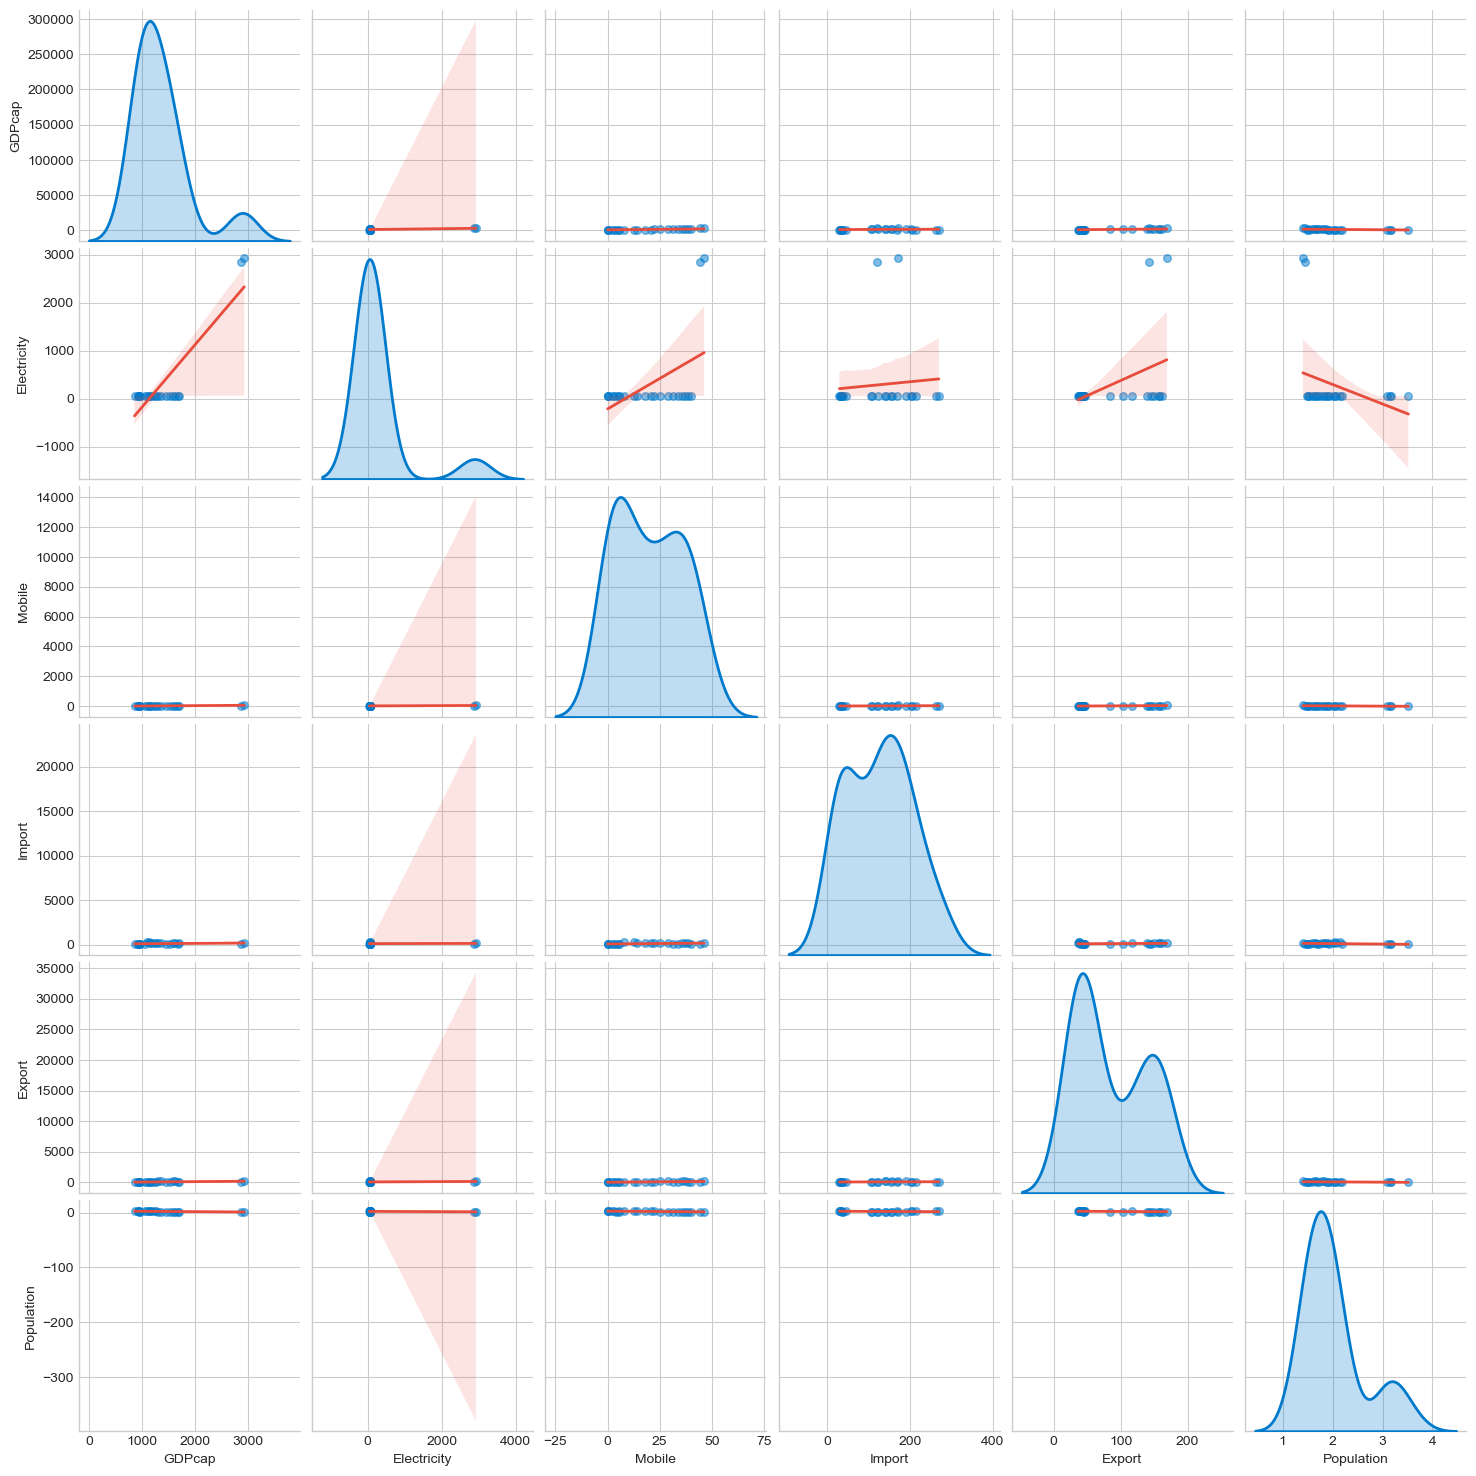

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Added for the sample data
import os # Added to handle file paths

# --- 1. Load and Prepare Your Data ---
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Using sample data instead.")
    # Create sample data for demonstration
    data = {'GDPcap': np.random.rand(50)*5000, 'Electricity': np.random.rand(50)*100,
            'Mobile': np.random.rand(50)*150, 'Import': np.random.rand(50)*1000,
            'Export': np.random.rand(50)*800, 'Population': np.random.rand(50)*1e6}
    df = pd.DataFrame(data)
    df['GDPcap'] += df['Electricity'] * 20

# Select the variables you want to plot
plot_vars = ['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']
df_subset = df[plot_vars]

# --- 2. Create the Pair Plot ---
# Use a clean, modern style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the pair plot using seaborn
g = sns.pairplot(
    df_subset,
    kind='reg',  # 'reg' adds a regression line to the scatter plots
    diag_kind='kde', # 'kde' shows a smooth distribution on the diagonal
    plot_kws={'line_kws': {'color': '#E74C3C', 'linewidth': 2}, # Style for regression line
              'scatter_kws': {'alpha': 0.5, 's': 30, 'color': '#007ACC'}}, # Style for scatter points
    diag_kws={'color': '#007ACC', 'linewidth': 2} # Style for diagonal distribution plots
)




# ======================================================================
# --- NEW: Save the Figure Before Showing It ---
# ======================================================================

# 1. Define the folder where you want to save the file.
save_directory = r"C:\Users\dirir\Downloads\IGAD countries\corrected findings"

# 2. Define the name of your output file.
file_name = "pairplot_economic_indicators.png"

# 3. Create the full path.
full_save_path = os.path.join(save_directory, file_name)

# 4. Make sure the directory exists.
os.makedirs(save_directory, exist_ok=True)

# 5. Save the figure using the 'g' object.
#    'dpi=300' ensures high quality.
g.savefig(full_save_path, dpi=300)

print(f"\nFigure saved successfully to: {full_save_path}")
# ======================================================================

# Finally, display the plot on screen
plt.show()

In [48]:
!pip install cmasher


   ---------------------------------------- 0/2 [colorspacious]
   -------------------- ------------------- 1/2 [cmasher]
   -------------------- ------------------- 1/2 [cmasher]
   ---------------------------------------- 2/2 [cmasher]



Data loaded successfully!

Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\corrected findings\clustered_correlation_heatmap.png


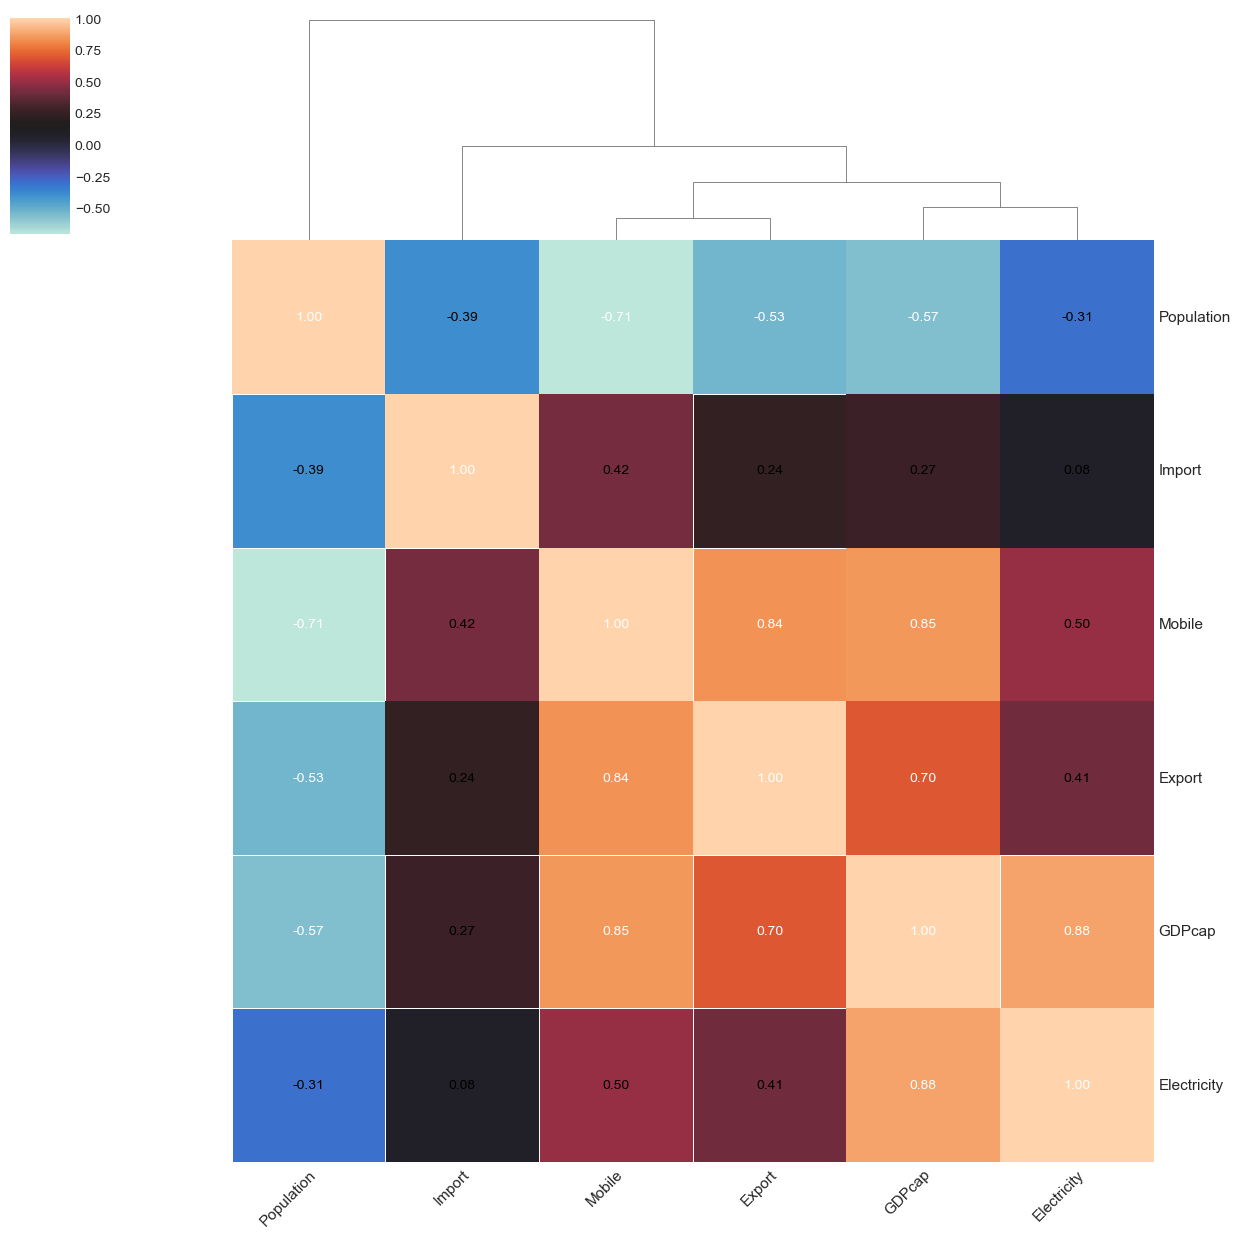

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os # Import the os library to handle file paths

# --- 1. Load and Prepare Your Data ---
# Load your data (replace with your actual file path)
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Using sample data instead.")
    # Create sample data with known clusters for a clear demonstration
    np.random.seed(42)
    data = {
        'GDPcap': np.random.rand(50) * 5000, 'Electricity': np.random.rand(50) * 100,
        'Mobile': np.random.rand(50) * 150, 'Import': np.random.rand(50) * 1000,
        'Export': np.random.rand(50) * 800, 'Population': np.random.rand(50) * 1e6
    }
    df = pd.DataFrame(data)
    # Create strong positive correlations in one cluster
    df['GDPcap'] += df['Electricity'] * 30 + df['Mobile'] * 20
    # Create a moderate negative correlation in another
    df['Import'] -= df['Export'] * 0.5
df_subset = df[['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']]

# --- 2. Compute the Correlation Matrix ---
corr_matrix = df_subset.corr()

# --- 3. Create the Clustered Heatmap ---
# Use a clean, modern style as a base
plt.style.use('seaborn-v0_8-white')

# Create the clustermap. This function handles the reordering of rows/columns.
cluster_map = sns.clustermap(
    corr_matrix,
    method='ward',           # Clustering algorithm
    cmap='icefire',          # A modern blue-white-red diverging palette
    annot=False,             # We will add annotations manually for better styling
    linewidths=.5,           # Add subtle lines between cells
    figsize=(12, 12)         # Set the figure size
)

# --- 4. Manually Add Annotations with Contrasting Text Color ---
# This ensures text is readable on both light and dark cells.
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        # Get the correlation value from the reordered matrix
        value = cluster_map.data2d.iloc[i, j]
        # Determine text color based on the cell's background color
        text_color = "white" if abs(value) > 0.5 else "black"
        # Add the text annotation
        cluster_map.ax_heatmap.text(
            j + 0.5, i + 0.5, f"{value:.2f}",
            ha="center", va="center",
            color=text_color,
            fontsize=10
        )

# --- 5. Mask the Upper Triangle for a Cleaner Look ---
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
# Apply the mask to the reordered data
masked_data = cluster_map.data2d.where(~np.array(mask)[cluster_map.dendrogram_row.reordered_ind][:, cluster_map.dendrogram_col.reordered_ind])
# Redraw the heatmap with the masked data
sns.heatmap(masked_data, cmap='icefire', annot=False, cbar=False, ax=cluster_map.ax_heatmap)


# --- 6. Customize the Final Plot ---
# Adjust titles and labels for a publication-ready look
plt.setp(cluster_map.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=11)
plt.setp(cluster_map.ax_heatmap.get_yticklabels(), rotation=0, fontsize=11)

# Customize the dendrogram line colors
cluster_map.ax_row_dendrogram.set_visible(False) # Hide row dendrogram for a cleaner look
for line in cluster_map.ax_col_dendrogram.collections:
    line.set_color('#555555')



# ======================================================================
# --- NEW: Save the Figure Before Showing It ---
# ======================================================================

# 1. Define the folder where you want to save the file.
save_directory = r"C:\Users\dirir\Downloads\IGAD countries\corrected findings"

# 2. Define the name of your output file.
file_name = "clustered_correlation_heatmap.png"

# 3. Create the full path.
full_save_path = os.path.join(save_directory, file_name)

# 4. Make sure the directory exists.
os.makedirs(save_directory, exist_ok=True)

# 5. Save the figure using the 'cluster_map' object.
#    'dpi=300' ensures high quality.
cluster_map.savefig(full_save_path, dpi=300)

print(f"\nFigure saved successfully to: {full_save_path}")
# ======================================================================

# Finally, display the plot on screen
plt.show()

In [215]:
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# === Load Data ===
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"
df = pd.read_excel(file_path)

# === Define predictors and targets ===
X = df[['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']]
y_industry = df['Industry']
y_service = df['Service']

# === Create and fit ElasticNet model for Industry ===
pipe_industry = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, random_state=0))
pipe_industry.fit(X, y_industry)
coef_industry = pipe_industry.named_steps['elasticnetcv'].coef_
alpha_industry = pipe_industry.named_steps['elasticnetcv'].alpha_

# === Create and fit ElasticNet model for Service ===
pipe_service = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, random_state=0))
pipe_service.fit(X, y_service)
coef_service = pipe_service.named_steps['elasticnetcv'].coef_
alpha_service = pipe_service.named_steps['elasticnetcv'].alpha_

# === Display Coefficients ===
variables = X.columns.tolist()
print("📌 ElasticNet Coefficients (Industry):")
for var, coef in zip(variables, coef_industry):
    print(f"{var}: {coef:.4f}")
print(f"Best alpha (Industry): {alpha_industry:.4f}\n")

print("📌 ElasticNet Coefficients (Service):")
for var, coef in zip(variables, coef_service):
    print(f"{var}: {coef:.4f}")
print(f"Best alpha (Service): {alpha_service:.4f}")


📌 ElasticNet Coefficients (Industry):
GDPcap: -0.0000
Electricity: -1.5911
Mobile: 1.3340
Import: 0.4562
Export: 0.5911
Population: -0.2382
Best alpha (Industry): 0.2175

📌 ElasticNet Coefficients (Service):
GDPcap: -0.0000
Electricity: 0.5686
Mobile: -1.4138
Import: -0.5733
Export: -0.5265
Population: 0.4423
Best alpha (Service): 0.1403


C:\Users\dirir\AppData\Local\Temp\ipykernel_39980\1512931262.py:42: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=df_long, x='Sector', y='Coefficient', hue='Sector',
C:\Users\dirir\AppData\Local\Temp\ipykernel_39980\1512931262.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Industry', 'Service'])



Figure saved successfully to: raincloud_swarm_plot.png

Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\corrected findings\raincloud_swarm_plot.png


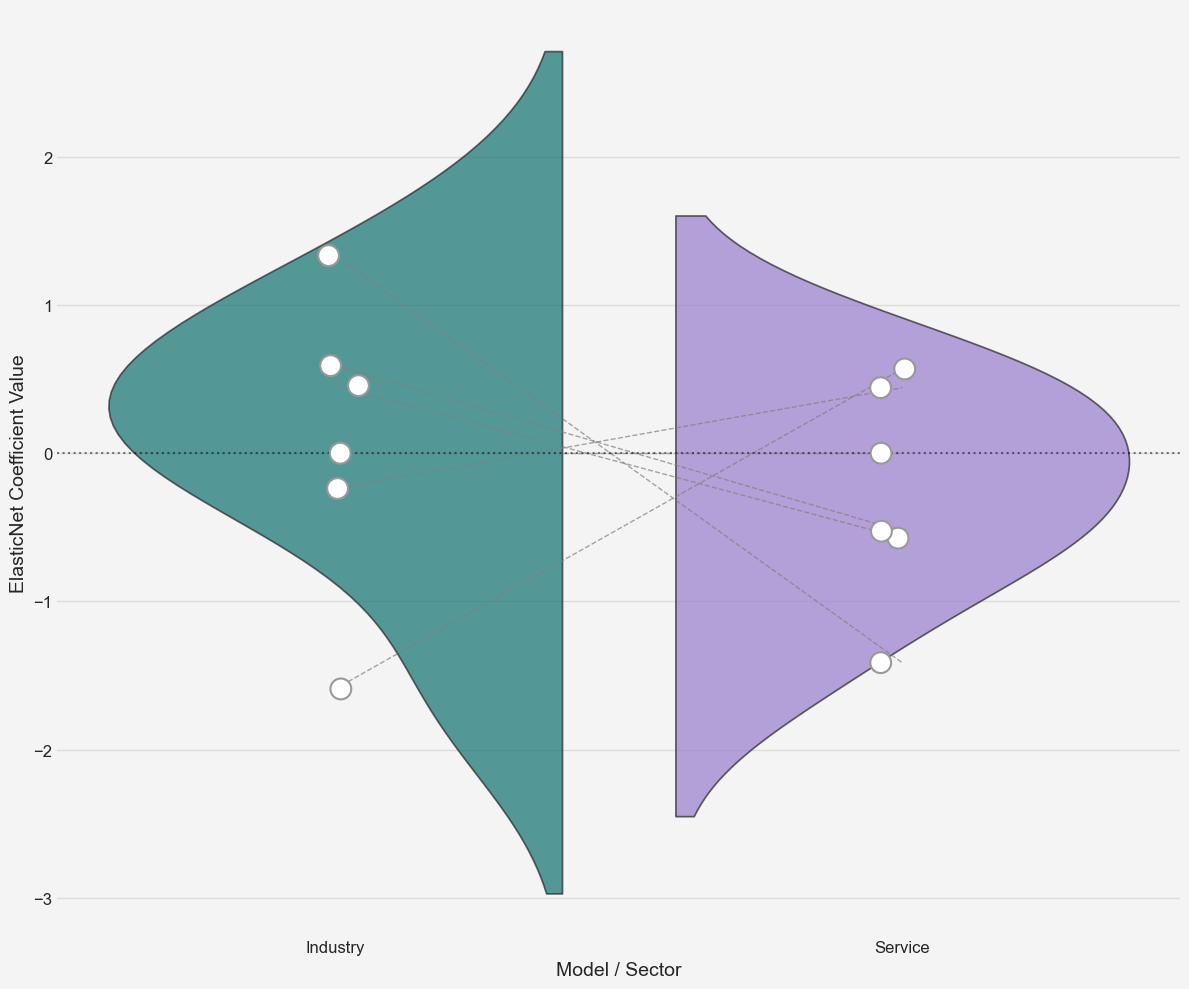

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Your Data ---
variables = ['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']
elasticnet_industry = np.array([-0.0000, -1.5911, 1.3340, 0.4562, 0.5911, -0.2382])
elasticnet_service = np.array([-0.0000, 0.5686, -1.4138, -0.5733, -0.5265, 0.4423])

# --- 2. Data Preparation ---
df = pd.DataFrame({
    'Variable': variables,
    'Industry': elasticnet_industry,
    'Service': elasticnet_service
})
df_long = pd.melt(df, id_vars='Variable', var_name='Sector', value_name='Coefficient')

# --- 3. Aesthetic Configuration ---
# MODIFIED: New color palette
plt.style.use('seaborn-v0_8-white')
INDUSTRY_COLOR = "#008080"  # A deep Teal
SERVICE_COLOR = "#9370DB"   # A medium Purple
BG_COLOR = "#F4F4F4"
GRID_COLOR = "#DCDCDC"

# --- 4. Create the Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
fig.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)

# --- Draw the "Cloud" (Split Violin Plot) ---
# MODIFIED: Added alpha for transparency
sns.violinplot(data=df_long, x='Sector', y='Coefficient', hue='Sector',
               split=True, inner=None,
               palette={'Industry': INDUSTRY_COLOR, 'Service': SERVICE_COLOR},
               legend=False,
               alpha=0.7,  # <-- ADDED TRANSPARENCY
               ax=ax)

# --- Draw the "Rain" (Individual Points) and Connecting Lines ---
sns.stripplot(data=df_long, x='Sector', y='Coefficient', hue='Sector',
              jitter=0.05,
              palette={'Industry': '#FFFFFF', 'Service': '#FFFFFF'},
              edgecolor='gray',
              linewidth=1.5,
              s=15,
              legend=False,
              ax=ax)

# Add connecting lines
for var in variables:
    industry_val = df.loc[df['Variable'] == var, 'Industry'].iloc[0]
    service_val = df.loc[df['Variable'] == var, 'Service'].iloc[0]
    ax.plot([0, 1], [industry_val, service_val], color='gray', linestyle='--', linewidth=1, alpha=0.7)


ax.set_xlabel("Model / Sector", fontsize=14)
ax.set_ylabel("ElasticNet Coefficient Value", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['Industry', 'Service'])

ax.axhline(0, color='black', linestyle=':', linewidth=1.5, alpha=0.5)

# --- 6. Refine Grid and Spines ---
ax.grid(axis='y', color=GRID_COLOR, linestyle='-', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# --- 7. Save the Figure ---
output_path = "raincloud_swarm_plot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=BG_COLOR)
print(f"\nFigure saved successfully to: {output_path}")


plt.tight_layout()
import os

# Define the full path where you want to save the image
save_directory = r"C:\Users\dirir\Downloads\IGAD countries\corrected findings"
file_name = "raincloud_swarm_plot.png"
output_path = os.path.join(save_directory, file_name)

# Make sure the folder exists
os.makedirs(save_directory, exist_ok=True)

# Save the figure
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=BG_COLOR)
print(f"\nFigure saved successfully to: {output_path}")
plt.show()

Data loaded successfully!

Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\corrected findings\optimal_number_for_fomponent_plot.png


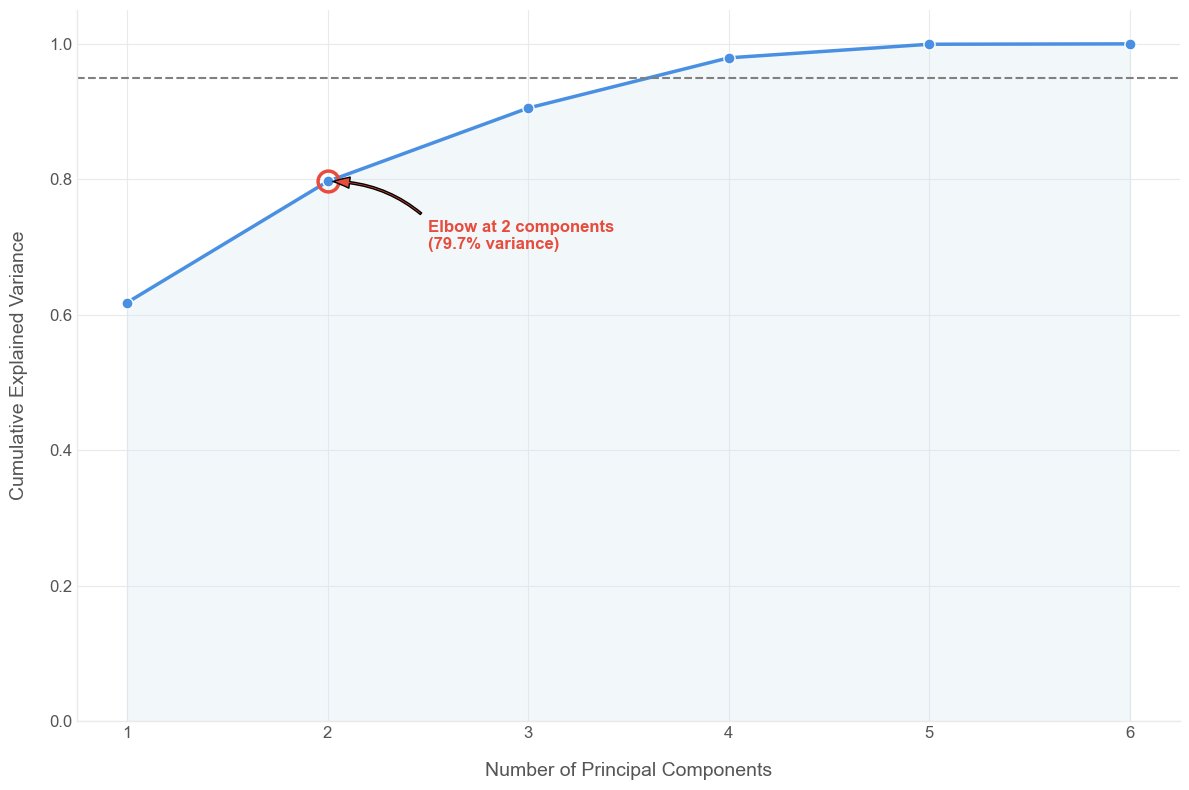

In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Your Data ---
# Load your data (replace with your actual file path)
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Using sample data instead.")
    # Create sample data for demonstration
    np.random.seed(42)
    data = {'GDPcap': np.random.rand(50)*5000, 'Electricity': np.random.rand(50)*100,
            'Mobile': np.random.rand(50)*150, 'Import': np.random.rand(50)*1000,
            'Export': np.random.rand(50)*800, 'Population': np.random.rand(50)*1e6}
    df = pd.DataFrame(data)
    df['GDPcap'] += df['Electricity'] * 20

features = ['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']
X = df[features].copy()

# --- 2. Standardize and Apply PCA ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)

# --- 3. Extract Explained Variance ---
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = len(features)
component_numbers = range(1, n_components + 1)

# --- 4. Aesthetic Configuration ---
plt.style.use('seaborn-v0_8-whitegrid')
LINE_COLOR = '#4A90E2'      # A strong, professional blue
FILL_COLOR = '#D4E6F1'      # A light, complementary blue
HIGHLIGHT_COLOR = '#E74C3C' # A contrasting red for annotations
GRID_COLOR = '#EAEAEA'
TITLE_COLOR = '#333333'
LABEL_COLOR = '#555555'

# --- 5. Create the Plot ---
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('white')
ax.set_facecolor('white')

# --- Plot the Cumulative Variance Line and Shaded Area ---
ax.plot(component_numbers, cumulative_variance, color=LINE_COLOR, linewidth=2.5, marker='o', markersize=8, markeredgecolor='white')
ax.fill_between(component_numbers, cumulative_variance, alpha=0.3, color=FILL_COLOR)

# --- 6. Add Advanced Annotations and Styling ---
# Find and highlight the "elbow" point (e.g., at 2 components)
elbow_point = 2
elbow_variance = cumulative_variance[elbow_point - 1]
ax.plot(elbow_point, elbow_variance, 'o', markersize=15,
        markeredgecolor=HIGHLIGHT_COLOR, markerfacecolor='none', markeredgewidth=2.5)

# Annotate the elbow point with its value
ax.annotate(f'Elbow at {elbow_point} components\n({elbow_variance*100:.1f}% variance)',
            xy=(elbow_point, elbow_variance),
            xytext=(elbow_point + 0.5, elbow_variance - 0.1),
            arrowprops=dict(facecolor=HIGHLIGHT_COLOR, shrink=0.05, width=1.5, headwidth=8, connectionstyle="arc3,rad=.2"),
            fontsize=12, fontweight='bold', color=HIGHLIGHT_COLOR)

# Add a horizontal line for a common threshold (e.g., 95%)
threshold = 0.95
ax.axhline(y=threshold, color='gray', linestyle='--', linewidth=1.5, label=f'{threshold*100:.0f}% Threshold')


ax.set_xlabel("Number of Principal Components", fontsize=14, color=LABEL_COLOR, labelpad=15)
ax.set_ylabel("Cumulative Explained Variance", fontsize=14, color=LABEL_COLOR, labelpad=15)

# --- 8. Refine Grid and Spines for a Minimalist Look ---
ax.grid(color=GRID_COLOR, linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(GRID_COLOR)
ax.spines['bottom'].set_color(GRID_COLOR)
ax.tick_params(axis='both', which='major', labelsize=12, colors=LABEL_COLOR)
ax.set_xticks(component_numbers) # Ensure ticks are on whole numbers
ax.set_ylim(0, 1.05) # Set y-axis limits

# --- 9. Final Touches ---
plt.tight_layout()
# --- 7. Save the Figure ---
# Define the folder where you want to save the file
save_directory = r"C:\Users\dirir\Downloads\IGAD countries\corrected findings"
file_name = "optimal_number_for_fomponent_plot.png"
full_save_path = os.path.join(save_directory, file_name)

# Make sure the directory exists
os.makedirs(save_directory, exist_ok=True)

# Save the figure before showing it
plt.savefig(full_save_path, dpi=300, bbox_inches='tight')
print(f"\nFigure saved successfully to: {full_save_path}")
plt.show()

Data loaded successfully!

Figure saved successfully to: C:\Users\dirir\Downloads\IGAD countries\corrected findings\pca_loadings_lollipop_plot.png


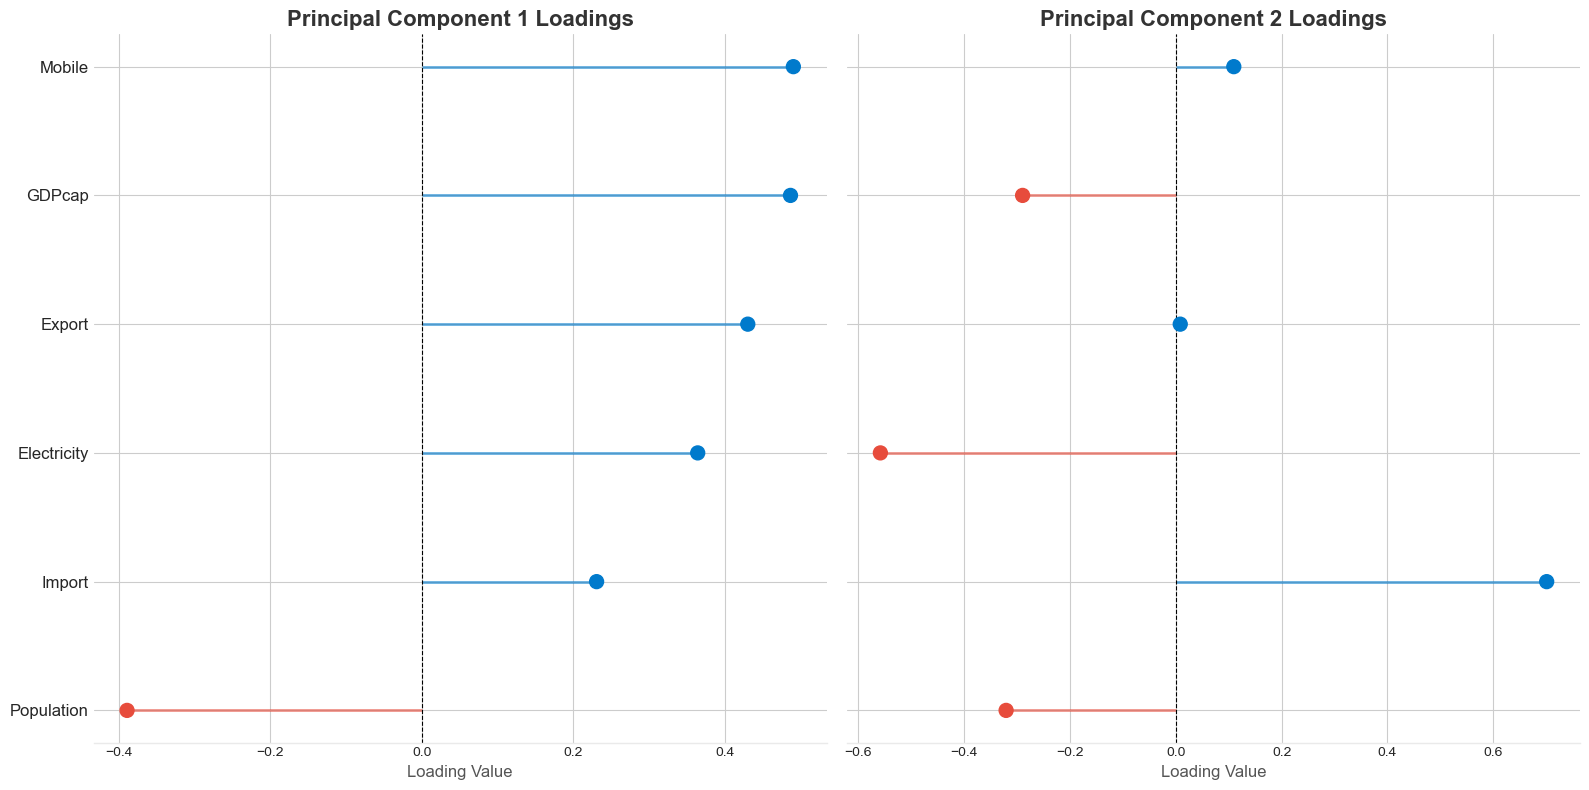

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === 1. Load and Prepare Data (from your script) ===
# Load your data (replace with your actual file path)
file_path = r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Using sample data instead.")
    np.random.seed(42)
    data = {'GDPcap': np.random.rand(50)*5000, 'Electricity': np.random.rand(50)*100,
            'Mobile': np.random.rand(50)*150, 'Import': np.random.rand(50)*1000,
            'Export': np.random.rand(50)*800, 'Population': np.random.rand(50)*1e6}
    df = pd.DataFrame(data)
    df['GDPcap'] += df['Electricity'] * 20

features = ['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Apply PCA with 2 Components ===
pca = PCA(n_components=2)
pca.fit(X_scaled)

# === 3. Get the PCA Loadings DataFrame ===
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)

# === 4. Create the Advanced Lollipop Plot ===
# Aesthetic Configuration
plt.style.use('seaborn-v0_8-whitegrid')
POSITIVE_COLOR = "#007ACC"  # Blue for positive loadings
NEGATIVE_COLOR = "#E74C3C"  # Red for negative loadings
GRID_COLOR = '#EAEAEA'
TITLE_COLOR = '#333333'
LABEL_COLOR = '#555555'

# Create a figure with two subplots (one for each PC)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
fig.set_facecolor('white')

# --- Plot for Principal Component 1 ---
# Sort by loading value for better visual structure
pc1_loadings = loadings['PC1'].sort_values()
colors_pc1 = [POSITIVE_COLOR if x >= 0 else NEGATIVE_COLOR for x in pc1_loadings]

# Draw horizontal lines (the "sticks")
ax1.hlines(y=pc1_loadings.index, xmin=0, xmax=pc1_loadings, color=colors_pc1, alpha=0.6, linewidth=2)
# Draw the dots (the "lollipops")
ax1.scatter(pc1_loadings, pc1_loadings.index, color=colors_pc1, s=100, zorder=3)

# --- Plot for Principal Component 2 ---
# Sort by loading value
pc2_loadings = loadings['PC2'].sort_values()
colors_pc2 = [POSITIVE_COLOR if x >= 0 else NEGATIVE_COLOR for x in pc2_loadings]

# Draw horizontal lines and dots
ax2.hlines(y=pc2_loadings.index, xmin=0, xmax=pc2_loadings, color=colors_pc2, alpha=0.6, linewidth=2)
ax2.scatter(pc2_loadings, pc2_loadings.index, color=colors_pc2, s=100, zorder=3)

# --- 5. Customize and Style Both Plots ---
ax1.set_title("Principal Component 1 Loadings", fontsize=16, fontweight='bold', color=TITLE_COLOR)
ax2.set_title("Principal Component 2 Loadings", fontsize=16, fontweight='bold', color=TITLE_COLOR)

for ax in [ax1, ax2]:
    ax.set_xlabel("Loading Value", fontsize=12, color=LABEL_COLOR)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.8) # Zero line
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=12, color=LABEL_COLOR)
    # Remove unnecessary spines for a clean look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color(GRID_COLOR)



# --- 6. Final Touches ---
plt.tight_layout()
# --- 7. Save the Figure ---
# Define the folder where you want to save the file
save_directory = r"C:\Users\dirir\Downloads\IGAD countries\corrected findings"
file_name = "pca_loadings_lollipop_plot.png"
full_save_path = os.path.join(save_directory, file_name)

# Make sure the directory exists
os.makedirs(save_directory, exist_ok=True)

# Save the figure before showing it
plt.savefig(full_save_path, dpi=300, bbox_inches='tight')
print(f"\nFigure saved successfully to: {full_save_path}")
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# === 1. Load and Prepare Data (Same as before) ===
df = pd.read_excel(r"C:\Users\dirir\Downloads\IGAD countries\Djibouti.xlsx")
features = ['GDPcap', 'Electricity', 'Mobile', 'Import', 'Export', 'Population']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Apply PCA with n_components=2 (Same as before) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# === 3. Combine PCA results with dependent variables ===
# Make sure the indices align correctly
df_final = pd.concat([df[['Industry', 'Service']], df_pca], axis=1).dropna()

# Prepare the data for regression
y_industry = df_final['Industry']
y_service = df_final['Service']
X_reg = sm.add_constant(df_final[['PC1', 'PC2']]) # Add a constant for the intercept

# === 4. Run Principal Component Regressions (PCR) ===
model_pcr_industry = sm.OLS(y_industry, X_reg).fit()
model_pcr_service = sm.OLS(y_service, X_reg).fit()

# === 5. Create a Publication-Quality Table for the Results ===
# Extract key statistics from both models
results = {
    "PCR (Industry)": {
        "Intercept": model_pcr_industry.params['const'],
        "PC1": model_pcr_industry.params['PC1'],
        "PC2": model_pcr_industry.params['PC2'],
        "R-squared": model_pcr_industry.rsquared_adj,
        "Observations": int(model_pcr_industry.nobs)
    },
    "PCR (Service)": {
        "Intercept": model_pcr_service.params['const'],
        "PC1": model_pcr_service.params['PC1'],
        "PC2": model_pcr_service.params['PC2'],
        "R-squared": model_pcr_service.rsquared_adj,
        "Observations": int(model_pcr_service.nobs)
    }
}

# Create and format the DataFrame
results_df = pd.DataFrame(results)
print("\n--- Principal Component Regression Results ---")
print(results_df.round(4))


--- Principal Component Regression Results ---
              PCR (Industry)  PCR (Service)
Intercept            18.6548        77.5172
PC1                   0.5726        -1.0629
PC2                   1.7610        -1.1893
R-squared             0.5774         0.7743
Observations         24.0000        24.0000


FINISHED PART 1

| Component                       | Done? | Insight                                                   |
| ------------------------------- | ----- | --------------------------------------------------------- |
| Sectoral trend analysis (OLS)   | ✅     | Evidence of structural change via shifts in shares        |
| Multicollinearity check (VIF)   | ✅     | Justified use of regularized models                       |
| Correlation matrix              | ✅     | Showed which variables cluster                            |
| Quantile-on-Quantile Regression | ✅     | Nonlinear, conditional relationships                      |
| Lasso/Ridge Regression          | ✅     | Regularization to identify key drivers                    |
| ElasticNet                      | ✅     | Hybrid penalty model capturing both shrinkage + selection |
| PCA + PCA Regression            | ✅     | Dimension reduction and latent factor modeling            |
